In [1]:
#First of all, we need to import the libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Uploading the dataset and printing first few rows
car_kick=pd.read_csv('car_kicks.csv')
car_kick.head()

,Unnamed: 0,PurchDate,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,...,Transmission,WheelTypeID,WheelType,Nationality,Size,TopThreeAmericanName,VNZIP1,VNST,IsOnlineSale,Class
0,0,1.289952e+09,2006.0,4,51954.0,6197.0,7062.0,9605.0,10426.0,5341.0,...,AUTO,2.0,Covers,AMERICAN,MEDIUM,CHRYSLER,32124,FL,0,0
1,1,1.242691e+09,2005.0,4,89127.0,3688.0,4783.0,4483.0,5666.0,3688.0,...,AUTO,2.0,Covers,AMERICAN,MEDIUM,FORD,78754,TX,0,0
2,2,1.248221e+09,2006.0,3,71271.0,6897.0,8449.0,7949.0,9625.0,6868.0,...,AUTO,1.0,Alloy,AMERICAN,LARGE,GM,80011,CO,0,0
3,3,1.285718e+09,2008.0,2,83338.0,7878.0,8925.0,11723.0,13026.0,7801.0,...,AUTO,2.0,Covers,AMERICAN,LARGE,GM,94544,CA,0,0
4,4,1.237334e+09,2007.0,2,58698.0,8800.0,10091.0,10004.0,11398.0,7355.0,...,AUTO,1.0,Alloy,AMERICAN,LARGE,GM,77086,TX,0,0


In [3]:
#As we can see we have a duplicate index column, which we can drop before moving forward
car_kick.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
#Now we can call .info() method to get more information about our columns
car_kick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67211 entries, 0 to 67210
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchDate                          67211 non-null  float64
 1   VehYear                            67211 non-null  float64
 2   VehicleAge                         67211 non-null  int64  
 3   VehOdo                             67211 non-null  float64
 4   MMRAcquisitionAuctionAveragePrice  67211 non-null  float64
 5   MMRAcquisitionAuctionCleanPrice    67211 non-null  float64
 6   MMRAcquisitionRetailAveragePrice   67211 non-null  float64
 7   MMRAcquisitonRetailCleanPrice      67211 non-null  float64
 8   MMRCurrentAuctionAveragePrice      67211 non-null  float64
 9   MMRCurrentAuctionCleanPrice        67211 non-null  float64
 10  MMRCurrentRetailAveragePrice       67211 non-null  float64
 11  MMRCurrentRetailCleanPrice         67211 non-null  flo

So we have 29 columns, 8 of which represent the price of the car. We also don't have any missing values.4 of the price columns represent the price of the car when it was bought from the auction, the other 4 - the price of the car when the data was collected. Each of those groups include average and clean prices in both auction and retail.Now we'll check the data types and look for outliers in our dataset.

In [5]:
car_kick.describe()

,PurchDate,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,WarrantyCost,WheelTypeID,VNZIP1,IsOnlineSale,Class
count,6.721100e+04,67211.000000,67211.000000,67211.000000,67211.000000,67211.000000,67211.000000,67211.000000,67211.000000,67211.000000,67211.000000,67211.000000,67211.000000,67211.000000,67211.000000,67211.000000,67211.000000
mean,1.263166e+09,2005.352606,4.168588,71734.558971,6162.054589,7411.975123,8538.503787,9895.922423,6166.708827,7429.722307,8817.942123,10189.606300,1278.942301,1.493386,58272.452768,0.025055,0.095461
std,1.820779e+07,1.727873,1.707501,14387.245482,2452.884994,2714.884242,3154.090485,3384.033541,2426.946652,2678.289955,3086.591314,3305.531489,579.077788,0.521232,26117.388216,0.156295,0.293852
min,1.231114e+09,2001.000000,0.000000,5368.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,462.000000,1.000000,2764.000000,0.000000,0.000000
25%,1.247789e+09,2004.000000,3.000000,62163.000000,4311.000000,5456.500000,6319.000000,7525.500000,4311.000000,5468.000000,6565.000000,7822.000000,853.000000,1.000000,32124.000000,0.000000,0.000000
50%,1.264032e+09,2005.000000,4.000000,73530.000000,6163.000000,7380.000000,8498.000000,9868.000000,6130.000000,7390.000000,8811.000000,10175.000000,1169.000000,1.000000,74135.000000,0.000000,0.000000
75%,1.279152e+09,2007.000000,5.000000,82530.000000,7806.000000,9049.000000,10709.500000,12153.500000,7776.000000,9045.000000,10972.000000,12370.000000,1623.000000,2.000000,80022.000000,0.000000,0.000000
max,1.293667e+09,2010.000000,9.000000,115717.000000,35722.000000,36859.000000,39080.000000,40308.000000,35722.000000,36859.000000,39080.000000,40308.000000,7498.000000,3.000000,99224.000000,1.000000,1.000000


The PurchDate column has numeric date time and unusual values for a date. The other numeric columns seems to not have outliers but we have some 0 values in our price columns which could be considered as missing values.

In [6]:
price_cols=['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice']
price_0=pd.DataFrame()
for col in price_cols:
    df=car_kick[car_kick[col]==0]
    price_0=pd.concat([price_0, df])
price_0.shape[0]

4735

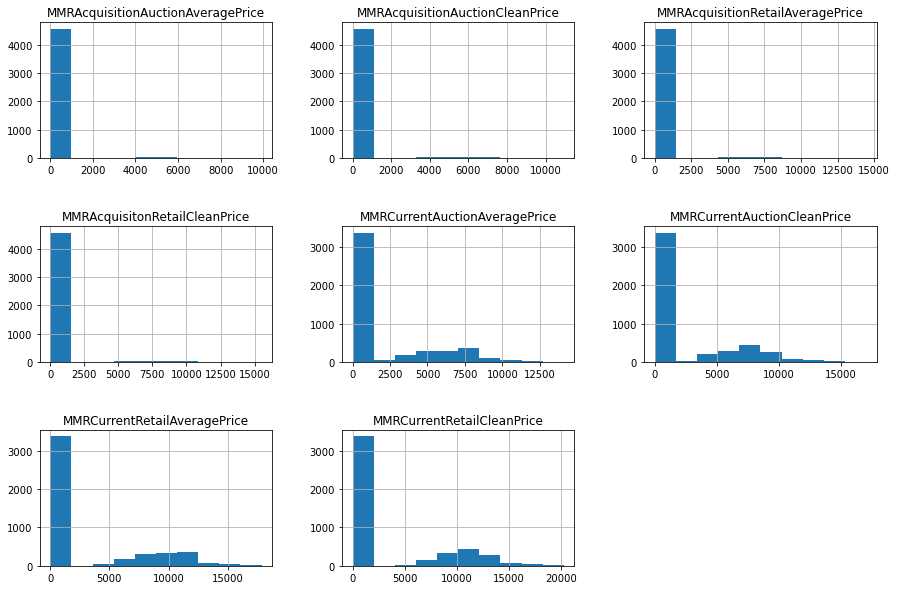

In [7]:
price_0[price_cols].hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

So, we have 4735 rows in our dataset that have 0 values in any of price columns, but how many of them have 0 value in all price columns.


In [8]:
all_0=price_0[(price_0[price_cols]==0).all(axis=1)]
all_0.shape[0]

2536

2536 of our rows have 0 value in all of the price columns which makes hard to use them for our future model but we can keep them for now as the information in other columns might be useful for our analysis.


In [9]:
all_0.describe()

,PurchDate,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,WarrantyCost,WheelTypeID,VNZIP1,IsOnlineSale,Class
count,2.536000e+03,2536.000000,2536.000000,2536.000000,2536.0,2536.0,2536.0,2536.0,2536.0,2536.0,2536.0,2536.0,2536.000000,2536.000000,2536.000000,2536.0,2536.000000
mean,1.252629e+09,2005.287066,3.842271,72496.154574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1418.615142,1.501577,58051.555205,0.0,0.091483
std,1.152324e+07,1.478714,1.596953,13896.928586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,729.639221,0.518682,26300.379590,0.0,0.288351
min,1.236902e+09,2001.000000,1.000000,14961.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,505.000000,1.000000,17545.000000,0.0,0.000000
25%,1.245370e+09,2005.000000,3.000000,64062.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,805.000000,1.000000,30212.000000,0.0,0.000000
50%,1.250640e+09,2005.000000,4.000000,74824.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1272.000000,1.000000,75020.000000,0.0,0.000000
75%,1.254874e+09,2006.000000,5.000000,83179.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1801.000000,2.000000,80229.000000,0.0,0.000000
max,1.292458e+09,2008.000000,9.000000,98567.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5092.000000,3.000000,98064.000000,0.0,1.000000


Regarding our numeric columns we can also change the data type for 'VehYear', 'VehOdo' 'WheelTypeID', 'VNZIP1' from float to int.


In [10]:
cols_fl=['VehYear', 'VehOdo', 'WheelTypeID', 'VNZIP1']
car_kick[cols_fl].astype('int64')

,VehYear,VehOdo,WheelTypeID,VNZIP1
0,2006,51954,2,32124
1,2005,89127,2,78754
2,2006,71271,1,80011
3,2008,83338,2,94544
4,2007,58698,1,77086
...,...,...,...,...
67206,2008,56072,2,77061
67207,2004,94232,1,28273
67208,2004,79534,1,37771
67209,2003,79394,2,92337


Now we can take a look at our categorical data.


In [11]:
car_kick['Auction'].value_counts(normalize=True)

MANHEIM    0.576766
OTHER      0.234590
ADESA      0.188645
Name: Auction, dtype: float64

The 'Auction' column shows the names of the auctions where cars were sold. We have 2 main companies - Manheim and Adesa.


In [12]:
car_kick['Auction']=car_kick['Auction'].str.title()

Next, we have car makes.

In [13]:
car_kick['Make'].value_counts()

CHEVROLET         16517
DODGE             12403
FORD              10687
CHRYSLER           8115
PONTIAC            3783
KIA                2284
NISSAN             1966
HYUNDAI            1707
SATURN             1679
JEEP               1554
TOYOTA             1096
MITSUBISHI          968
MAZDA               882
MERCURY             792
BUICK               676
GMC                 622
HONDA               468
SUZUKI              276
OLDSMOBILE          224
ISUZU               130
VOLKSWAGEN          118
SCION               103
VOLVO                37
LINCOLN              31
SUBARU               25
MINI                 24
ACURA                23
CADILLAC             14
INFINITI              3
PLYMOUTH              2
'TOYOTA SCION'        1
LEXUS                 1
Name: Make, dtype: int64

The only problem here is the 'TOYOTA SCION' value which should be either Toyota or Scion


In [14]:
car_kick['Make']=car_kick['Make'].str.replace("'TOYOTA SCION'", "Scion")
car_kick['Make']=car_kick['Make'].str.title()

In [15]:
car_kick['Model'].value_counts()

'PT CRUISER'              2195
IMPALA                    1922
TAURUS                    1369
CALIBER                   1296
'CARAVAN GRAND FWD V6'    1233
                          ... 
'TORRENT FWD V6'             1
'350Z MFI V6 3.5L DOH'       1
'RODEO 2WD 4C MFI I-4'       1
'CONCORDE 3.2L V6 EFI'       1
'ENVOY XL 4WD V8 5.3L'       1
Name: Model, Length: 953, dtype: int64

For models we have 953 unique values, but we can clean it by deleting the quotation marks and keeping the first two words of the model (the names of the cars usually are not longer than two words). And in order to eliminate the the additional information from the second word of the model name we can set a minimum limit of 4 characters in that word.

In [16]:
car_kick['Model']=car_kick['Model'].str.replace("'", "")
car_kick['Model']=car_kick['Model'].str.title()
models = car_kick['Model'].str.split(expand=True, n=1)
models.columns=['a', 'b']
print(models)

                a               b
0         Stratus              V6
1          Taurus     3.0L V6 Efi
2           Grand  Prix 3.8L V6 S
3          Impala              V6
4          Impala            None
...           ...             ...
67206          Pt         Cruiser
67207  Pathfinder          2Wd V6
67208       Grand           Am 4C
67209  Rendezvous             Fwd
67210      Mazda6            None

[67211 rows x 2 columns]


In [17]:
models['c']=models.apply(lambda x: (x['a'] if x['b'] is None or len(x['b'].split()[0])<4 else x['a']+ ' ' + x['b'].split()[0]), axis=1)
print(models)

                a               b            c
0         Stratus              V6      Stratus
1          Taurus     3.0L V6 Efi  Taurus 3.0L
2           Grand  Prix 3.8L V6 S   Grand Prix
3          Impala              V6       Impala
4          Impala            None       Impala
...           ...             ...          ...
67206          Pt         Cruiser   Pt Cruiser
67207  Pathfinder          2Wd V6   Pathfinder
67208       Grand           Am 4C        Grand
67209  Rendezvous             Fwd   Rendezvous
67210      Mazda6            None       Mazda6

[67211 rows x 3 columns]


In [18]:
car_kick['Model']=models['c']
car_kick['Model'].value_counts()

Pt Cruiser         3520
Impala             3195
Malibu             2888
Stratus            2453
Sebring            2357
                   ... 
Concorde 3.2L         1
Azera 3.8L            1
Altima Multiple       1
Malibu Hybrid         1
Sedona 3.5L           1
Name: Model, Length: 322, dtype: int64

Now we have 322 unique values in 'Models' column and we saved the rest of the information in the models dataframe in case we need them for our future analysis.

In [19]:
car_kick['Trim']=car_kick['Trim'].str.title()
car_kick['Trim'].value_counts()

Bas    13279
Ls      9761
Se      8851
Sxt     3702
Lt      3412
       ...  
Out        1
Har        1
Ult        1
Z24        1
Jls        1
Name: Trim, Length: 132, dtype: int64

For the 'Trim' column the most common value is 'Bas' which stands for 'Basic' or 'Base' and in order to check if that's#the only value that has that meaning we can find all the values that contain 'Ba' letters.

In [20]:
car_kick[car_kick['Trim'].str.contains('Ba')]['Trim'].value_counts()

Bas    13279
Name: Trim, dtype: int64

In [21]:
car_kick['SubModel'].value_counts()

'4D SEDAN'                    13363
'4D SEDAN LS'                  4541
'4D SEDAN SE'                  3648
'4D WAGON'                     1979
'MINIVAN 3.3L'                 1203
                              ...  
'5D SEDAN S GRAND TOURING'        1
'REG CAB 3.0L XLT'                1
'4D SUV 5.9L SLT PLUS'            1
'2D COUPE GX'                     1
'4D SEDAN LUXURY AWD'             1
Name: SubModel, Length: 823, dtype: int64

The 'Submodel' column shows the body style and the trim information which was also mentioned in 'Trim' column. Therefore we could limit the string of the column to 2 words in order to keep mainly the body style information but for now we can just delete the quotation marks and capitalize it, because we might need extra information for our analysis.

In [22]:
car_kick['SubModel']=car_kick['SubModel'].str.replace("'", "").str.title()

In [23]:
car_kick['Color'].value_counts()

SILVER         13683
WHITE          11285
BLUE            9515
GREY            7422
BLACK           6965
RED             5678
GOLD            4767
GREEN           2961
MAROON          1888
BEIGE           1435
BROWN            416
ORANGE           381
PURPLE           347
YELLOW           233
OTHER            175
'NOT AVAIL'       60
Name: Color, dtype: int64

For the 'Color' column we mostly have clean data, only 60 of the cars have missing values

In [24]:
car_kick['Color']=car_kick['Color'].str.title().str.replace("'", "")

In [25]:
car_kick['TopThreeAmericanName'].value_counts()

GM          23515
CHRYSLER    22074
FORD        11510
OTHER       10112
Name: TopThreeAmericanName, dtype: int64

In [26]:
car_kick['Transmission'].value_counts()

AUTO      64871
MANUAL     2339
Manual        1
Name: Transmission, dtype: int64

In [27]:
car_kick['WheelType'].value_counts()

Alloy      34780
Covers     31701
Special      730
Name: WheelType, dtype: int64

For the three columns above we have clean data. But in our dataset we have 2 columns representing the wheel types: 'WheelType' and 'WheelTypeID'. The types of the wheels are just replace with int values as you can see from the table below.

In [28]:
car_kick.groupby('WheelType')['WheelTypeID'].mean()

WheelType
Alloy      1.0
Covers     2.0
Special    3.0
Name: WheelTypeID, dtype: float64

In [29]:
cols_1=['TopThreeAmericanName', 'Transmission', 'WheelType']
for col in cols_1:
    car_kick[col]=car_kick[col].str.title()

In [30]:
car_kick['Nationality'].value_counts()

AMERICAN            57099
'OTHER ASIAN'        6407
'TOP LINE ASIAN'     3526
OTHER                 179
Name: Nationality, dtype: int64

In [31]:
car_kick['Size'].value_counts()

MEDIUM           28375
LARGE             8444
'MEDIUM SUV'      7149
COMPACT           6546
VAN               5422
'LARGE TRUCK'     3044
'SMALL SUV'       2162
SPECIALTY         1747
CROSSOVER         1433
'LARGE SUV'       1342
'SMALL TRUCK'      822
SPORTS             725
Name: Size, dtype: int64

And for the 'Nationality' and 'Size' columns some of the values have the quotation marks

In [32]:
cols_2=['Nationality', 'Size']
for col in cols_2:
    car_kick[col]=car_kick[col].str.replace("'", "").str.title()

In [33]:
car_kick['VNST'].value_counts()

TX    12737
FL     9669
CA     6466
NC     6277
AZ     5815
CO     4678
SC     3760
OK     3297
GA     2205
VA     1554
TN     1551
MD     1103
PA      822
UT      800
OH      744
MO      735
AL      634
NV      520
MS      483
IN      442
IA      441
IL      429
LA      312
NJ      312
WV      243
NM      218
KY      201
OR      190
ID      181
WA      130
NH       86
MN       61
AR       57
NE       26
MA       13
MI       13
NY        6
Name: VNST, dtype: int64

The 'VNST' column shows which state the navigation system was in. So basically it can show us in which state the car was driven before being sold on auction.

The last 2 columns are 'IsOnlineSale' and 'Class'. The first one shows whether the auction was online or not and the second one is the target column for our future model which shows whether the car is a 'kick' or not.

Now we can take a look at duplicate data. If we consider all the columns for identifying duplicates, we don't have any. But if we use a subset of columns we would find 2 pairs of duplicate rows.

In [34]:
car_dup=car_kick.duplicated()
print(car_kick[car_dup])

Empty DataFrame
Columns: [PurchDate, VehYear, VehicleAge, VehOdo, MMRAcquisitionAuctionAveragePrice, MMRAcquisitionAuctionCleanPrice, MMRAcquisitionRetailAveragePrice, MMRAcquisitonRetailCleanPrice, MMRCurrentAuctionAveragePrice, MMRCurrentAuctionCleanPrice, MMRCurrentRetailAveragePrice, MMRCurrentRetailCleanPrice, WarrantyCost, Auction, Make, Model, Trim, SubModel, Color, Transmission, WheelTypeID, WheelType, Nationality, Size, TopThreeAmericanName, VNZIP1, VNST, IsOnlineSale, Class]
Index: []

[0 rows x 29 columns]


In [53]:
subset_1=['VehYear', 'VehOdo', 'Make', 'Model', 'VNZIP1', 'Color', 'MMRAcquisitionAuctionCleanPrice']
car_dup_2=car_kick.duplicated(subset=subset_1, keep=False)
print(car_kick[car_dup_2])

          PurchDate  VehYear  VehicleAge   VehOdo  \
4640   1.245283e+09   2006.0           3  57626.0   
46534  1.232410e+09   2004.0           5  92005.0   
49804  1.242864e+09   2006.0           3  57626.0   
67199  1.232410e+09   2004.0           5  92005.0   

       MMRAcquisitionAuctionAveragePrice  MMRAcquisitionAuctionCleanPrice  \
4640                              5480.0                           6461.0   
46534                                0.0                              1.0   
49804                             5480.0                           6461.0   
67199                                0.0                              1.0   

       MMRAcquisitionRetailAveragePrice  MMRAcquisitonRetailCleanPrice  \
4640                             6418.0                         7478.0   
46534                               0.0                            0.0   
49804                            6418.0                         7478.0   
67199                               0.0             

In [49]:
car_kick.iloc[[4640, 49804]].T

,4640,49804
PurchDate,1245283200.0,1242864000.0
VehYear,2006.0,2006.0
VehicleAge,3,3
VehOdo,57626.0,57626.0
MMRAcquisitionAuctionAveragePrice,5480.0,5480.0
MMRAcquisitionAuctionCleanPrice,6461.0,6461.0
MMRAcquisitionRetailAveragePrice,6418.0,6418.0
MMRAcquisitonRetailCleanPrice,7478.0,7478.0
MMRCurrentAuctionAveragePrice,5638.0,5480.0
MMRCurrentAuctionCleanPrice,6512.0,6461.0


In [54]:
car_kick.iloc[[46534, 67199]].T

,46534,67199
PurchDate,1232409600.0,1232409600.0
VehYear,2004.0,2004.0
VehicleAge,5,5
VehOdo,92005.0,92005.0
MMRAcquisitionAuctionAveragePrice,0.0,0.0
MMRAcquisitionAuctionCleanPrice,1.0,1.0
MMRAcquisitionRetailAveragePrice,0.0,0.0
MMRAcquisitonRetailCleanPrice,0.0,0.0
MMRCurrentAuctionAveragePrice,0.0,0.0
MMRCurrentAuctionCleanPrice,1.0,1.0


If we don't consider the auction price as a identifying column we can find 7 more pairs of duplicate data, but the different auction prices and date values make clear that the same cars were sold twice on auctions. Now we can drop those two duplicate rows from our dataset.

In [55]:
car_kick.drop_duplicates(subset=subset_1, inplace=True)